In [320]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
"""
Can't load LinearDiscriminantAnalysis
Can't load MultinomialNB

"""
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import r2_score
import pickle

%matplotlib
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) #  display all the columns
pd.set_option('display.max_rows', 100) # display all the rows
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

Using matplotlib backend: MacOSX


# Loading data

In [293]:
df = pd.read_csv('Data/Binary_label_K_bins_train.csv')
df = df.sample(10000)
df.drop('Unnamed: 0',axis='columns',inplace=True)
X_train = df.drop('training labels',axis='columns')
y_train = df[['training labels']]

In [298]:
df = pd.read_csv('Data/Binary_label_K_bins_test.csv')
df = df.sample(1000)
df.drop('Unnamed: 0',axis='columns',inplace=True)
X_test = df.drop('testing labels',axis='columns')
y_test = df[['testing labels']]


# Logistic Regression

In [299]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [300]:
train_score = logisticRegr.score(X_train, y_train)
test_score = logisticRegr.score(X_test, y_test)

# These results are derived using the entire dataset
* using only those labels that signify a definitive outcome

In [301]:
print('Preliminary results for Logistic Regression:')
print('train score: ',train_score)
print('test score: ',test_score)

Preliminary results for Logistic Regression:
train score:  0.9787
test score:  0.979


# Saving the model

In [273]:
filename = 'Models/logit_model.sav'
pickle.dump(logisticRegr, open(filename, 'wb')) 

#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [274]:
logisticRegr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [275]:
loaded_model = pickle.load(open(filename, 'rb'))

# Replicating the Kaggle analysis code 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [307]:
def createROC(models, X, y, Xte, yte):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(yte, models[i].predict_proba(Xte)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
    return true_p, false_p ##returning the true postive and false positive

In [312]:
models = {'Random Forest': RandomForestClassifier(n_estimators=100),
          'Logistic Regression': LogisticRegression(C=1)}

model_performance = {}
for i in models.keys():
    scores = cross_val_score(models[i],X_train,y_train, cv=3)
    model_performance[i] = scores
    print(i, scores, np.mean(scores))

/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RF [0.966707 0.973005 0.961585] 0.9670988971473413


/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


LR [0.973605 0.978404 0.967887] 0.9732989176474428


/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [313]:
tp, fp = createROC(models,X_train,y_train,X_test,y_test)

/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [392]:
tp

[array([0.000000, 0.088832, 0.218274, 0.352792, 0.451777, 0.544416,
        0.602792, 0.672589, 0.766497, 0.808376, 0.854061, 0.869289,
        0.888325, 0.902284, 0.909898, 0.922589, 0.931472, 0.936548,
        0.944162, 0.954315, 0.958122, 0.964467, 0.968274, 0.970812,
        0.970812, 0.973350, 0.974619, 0.977157, 0.980964, 0.984772,
        0.986041, 0.987310, 0.988579, 0.988579, 0.989848, 0.989848,
        0.991117, 0.992386, 0.996193, 0.996193, 0.998731, 0.998731,
        0.998731, 0.998731, 0.998731, 0.998731, 0.998731, 0.998731,
        0.998731, 0.998731, 1.000000, 1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000,
        1.000000, 1.000000, 1.000000, 1.000000]),
 array([0.000000, 0.001269, 0.765228, 0.765228, 0.810914, 0.810914,
        0.888325, 0.888325, 0.893401, 0.893401, 0.939086, 0.939086

In [386]:
model =  LogisticRegression(C=1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/babyhandzzz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


(0.0, 2.0, 2.0, 0.0)

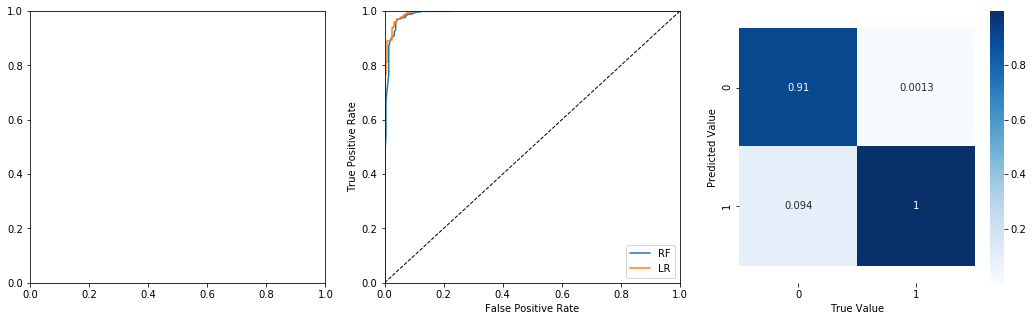

In [390]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for i in range(0, len(tp)):
    axes[1].plot(fp[i], tp[i])

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(y_test,predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')